In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

In [36]:
# Replace 'your_file.csv' with the actual path to your CSV files
ascending_input_file = 'CRC_HILIC_asceding_Ttest.csv'
ascending_output_file = 'CRC_HILIC_asceding_Ttest_output.csv'

selected_mz_value = 694.31494 

# Read the CSV files with a different encoding
df_ascending_file = pd.read_csv(ascending_input_file, encoding='latin1')
df_ascending_output_file = pd.read_csv(ascending_output_file, encoding='latin1')




C:\Users\Chinnu\AppData\Local\Temp\ipykernel_12380\1722783974.py:9: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ascending_output_file = pd.read_csv(ascending_output_file, encoding='latin1')


In [37]:
# Assuming 'mz' is a column in df_ascending_output_file
selected_row_output = df_ascending_output_file[df_ascending_output_file['mz'] == selected_mz_value]

if not selected_row_output.empty:
    raw_pval = selected_row_output['raw_pval'].values[0]
    q_fdr = selected_row_output['q_fdr'].values[0]
    log_fc_matched = selected_row_output['log_fc_matched'].values[0]

    print(f"Raw P-value: {raw_pval}")
    print(f"Q FDR: {q_fdr}")
    print(f"Log FC Matched: {log_fc_matched}")
else:
    print(f"No data found for the selected 'mz' value in df_ascending_output_file.")


Raw P-value: 4.81e-05
Q FDR: 0.000822962
Log FC Matched: 0.878655926


1


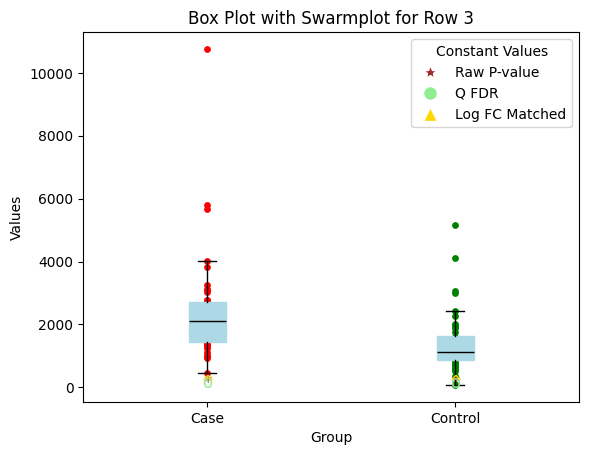

done


In [41]:
# df_ascending_output_file = pd.read_csv(ascending_output_file)

# Get the index of the row with the selected 'mz' value
desired_row_index = df_ascending_file.index[df_ascending_file['mz'] == selected_mz_value].tolist()


print(len(desired_row_index))
if len(desired_row_index) == 1:
    desired_row_index = desired_row_index[0] + 1  # Adjust index to start from 1

    # Extract data for the desired row
    row_data = df_ascending_file.iloc[desired_row_index - 1]  # Adjust index to start from 0

    # Filter columns with 'ascending_Case' and 'ascending_Control' in their names
    case_columns = row_data.filter(like='ascending_Case').tolist()
    control_columns = row_data.filter(like='ascending_Control').tolist()

    # Set different colors for 'ascending_Case' and 'ascending_Control'
    case_boxprops = dict(facecolor='red', color='red')
    control_boxprops = dict(facecolor='green', color='green')

    # Add swarmplot using Matplotlib scatter
    plt.scatter([1] * len(case_columns), case_columns, color="red", label="Case", s=15)
    plt.scatter([2] * len(control_columns), control_columns, color="green", label="Control", s=15)

    # Create a box plot with all data points (showfliers=True)
    plt.boxplot([case_columns, control_columns], labels=['Case','Control'], patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='lightblue'), medianprops=dict(color='black'), showfliers=False)

    # Set plot labels and title
    plt.xlabel('Group')
    plt.ylabel('Values')
    plt.title(f'Box Plot with Swarmplot for Row {desired_row_index}')

    # Show the legend
    plt.legend(title='Ascending Type', loc='upper left')

    # Add symbols for raw_pval, q_fdr, and log_fc_matched
    plt.annotate('*', xy=(1, float(raw_pval) ), color='brown', ha='center', fontsize=12)
    plt.annotate('o', xy=(1, float(q_fdr) ), color='lightgreen', ha='center', fontsize=12)
    plt.annotate('^', xy=(1, float(log_fc_matched)), color='gold', ha='center', fontsize=12)

    plt.annotate('*', xy=(2,  float(raw_pval)), color='brown', ha='center', fontsize=12)
    plt.annotate('o', xy=(2,  float(q_fdr)), color='lightgreen', ha='center', fontsize=12)
    plt.annotate('^', xy=(2, float(log_fc_matched)), color='gold', ha='center', fontsize=12)
    legend_elements = [
        Line2D([0], [0], marker='*', color='w', markerfacecolor='brown', markersize=10, label='Raw P-value'),
        Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen', markersize=10, label='Q FDR'),
        Line2D([0], [0], marker='^', color='w', markerfacecolor='gold', markersize=10, label='Log FC Matched')
    ]
    
    plt.legend(handles=legend_elements, loc='upper right', title='Constant Values')

    

    
    # Show the plot
    plt.savefig('boxplot_with_swarmplot.png')
    plt.show()
    print("done")



else:
    print(f"No unique row found for the selected 'mz' value.")
